This is adapted from scikitlearn documentation https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [130]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%precision %2g

'%2g'

In [131]:
iris = datasets.load_iris()
iris.data[1:10]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [132]:
t = np.shape(iris.data)[0]
t

150

In [133]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

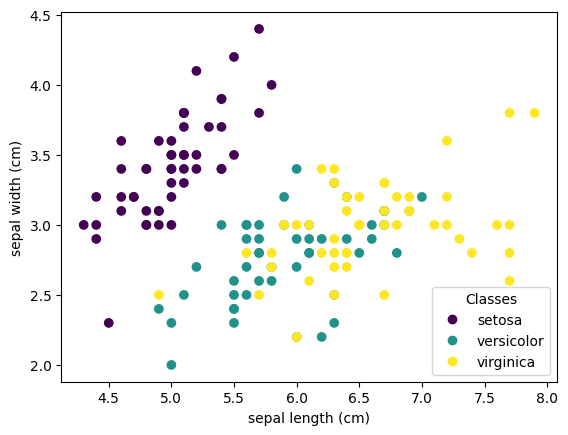

In [134]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [135]:
## normalize data
mean = iris.data.mean(axis=0)
stdev = iris.data.std(axis=0)
norm_data = (iris.data - mean) / stdev

In [136]:
S=(1/t)*np.dot(norm_data.transpose(),norm_data)
S

array([[ 1.  , -0.12,  0.87,  0.82],
       [-0.12,  1.  , -0.43, -0.37],
       [ 0.87, -0.43,  1.  ,  0.96],
       [ 0.82, -0.37,  0.96,  1.  ]])

In [137]:
L,U=np.linalg.eig(S)
# L - vlastne hodnoty, zotriedene od najvacsej po najmensiu
# U - vlastne vektory - pozor!! prvy vlastny vektor je prvy STLPEC
U = U.transpose()
L


array([2.92, 0.91, 0.15, 0.02])

In [138]:
transformed_data = np.dot(norm_data,U.transpose())
transformed_data[1:10]

array([[-2.08,  0.67, -0.23,  0.1 ],
       [-2.36,  0.34,  0.04,  0.03],
       [-2.3 ,  0.6 ,  0.09, -0.07],
       [-2.39, -0.65,  0.02, -0.04],
       [-2.08, -1.49,  0.03,  0.01],
       [-2.44, -0.05,  0.34, -0.04],
       [-2.23, -0.22, -0.09, -0.02],
       [-2.33,  1.12,  0.15, -0.03],
       [-2.18,  0.47, -0.25, -0.04]])

In [139]:
S_transformed = (1/t)*np.dot(transformed_data.transpose(),transformed_data)
S_transformed


array([[ 2.92e+00,  2.09e-16,  7.72e-16,  2.21e-16],
       [ 2.09e-16,  9.14e-01, -6.34e-16,  1.83e-16],
       [ 7.72e-16, -6.34e-16,  1.47e-01, -1.80e-16],
       [ 2.21e-16,  1.83e-16, -1.80e-16,  2.07e-02]])

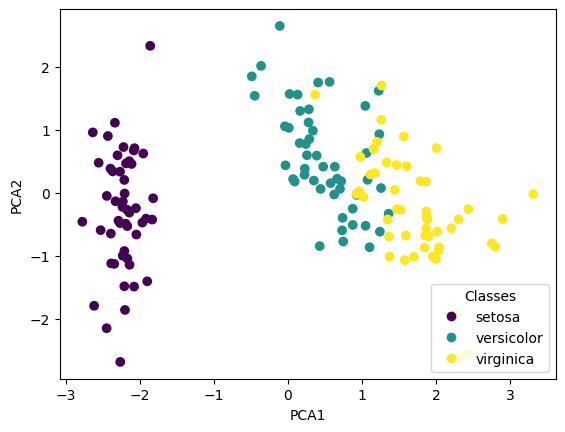

In [140]:
_, ax = plt.subplots()
scatter = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], c=iris.target)
ax.set(xlabel="PCA1", ylabel="PCA2")
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [141]:
U[0]

array([ 0.52, -0.27,  0.58,  0.56])

In [142]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/226px-Petal-sepal.jpg">

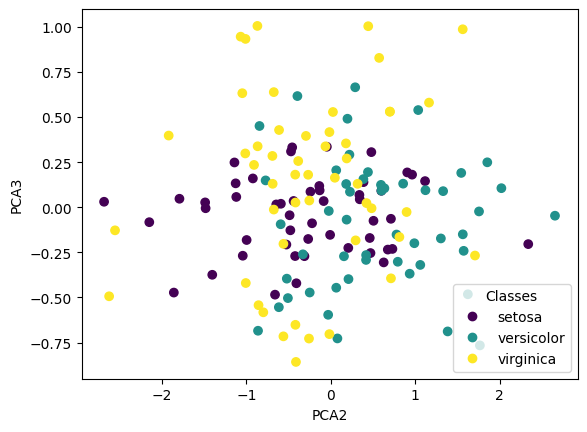

In [143]:
_, ax = plt.subplots()
scatter = ax.scatter(transformed_data[:, 1], transformed_data[:, 2], c=iris.target)
ax.set(xlabel="PCA2", ylabel="PCA3")
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)